In [1]:
%cd /content/
%rm -rf LLaMA-Factory
!git clone --depth 1 https://github.com/hiyouga/LLaMA-Factory.git
%cd LLaMA-Factory
%ls
!pip install torch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1
!pip uninstall -y jax
!pip install -e .[torch,bitsandbytes,liger-kernel]

/content
Cloning into 'LLaMA-Factory'...
remote: Enumerating objects: 315, done.
remote: Counting objects: 100% (315/315), done.
remote: Compressing objects: 100% (239/239), done.
remote: Total 315 (delta 78), reused 195 (delta 63), pack-reused 0 (from 0)
Receiving objects: 100% (315/315), 9.00 MiB | 29.92 MiB/s, done.
Resolving deltas: 100% (78/78), done.
/content/LLaMA-Factory
assets/       docker/      LICENSE      pyproject.toml  requirements.txt  src/
CITATION.cff  evaluation/  Makefile     README.md       scripts/          tests/
data/         examples/    MANIFEST.in  README_zh.md    setup.py
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 83.5 MB/s eta 0:00:00


In [2]:
!llamafactory-cli version

2024-10-14 09:01:34.658950: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-14 09:01:34.962350: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-14 09:01:35.043861: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-14 09:01:35.535799: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-14 09:01:38.030429: W tensorflow/comp

In [3]:
import json

In [4]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in 

In [5]:
!pip install datasets

In [14]:
!pip install bitsandbytes

In [17]:
from datasets import load_dataset
import json

# Download the dataset
dataset = load_dataset("MattCoddity/dockerNLcommands")

# Save the dataset locally
dataset.save_to_disk("docker_NL_dataset")

Generating train split:   0%|          | 0/2415 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2415 [00:00<?, ? examples/s]

In [18]:
from datasets import load_from_disk

# Load the dataset
dataset = load_from_disk("docker_NL_dataset")

# Print the first example
print(dataset['train'][0])

# Print the column names
print(dataset['train'].column_names)

{'input': 'Give me a list of containers that have the Ubuntu image as their ancestor.', 'output': "docker ps --filter 'ancestor=ubuntu'", 'instruction': 'translate this sentence in docker command'}
['input', 'output', 'instruction']


In [19]:
import json

dataset_info = {
    "docker_NL": {
        "hf_hub_url": "MattCoddity/dockerNLcommands",
        "columns": {
            "prompt": "instruction",
            "query": "input",
            "response": "output"
        }
    }
}

with open("dataset_info.json", "w") as f:
    json.dump(dataset_info, f, indent=2)

In [20]:
!pwd

/content/LLaMA-Factory


In [21]:
!CUDA_VISIBLE_DEVICES=0 python src/webui.py


2024-10-14 09:33:19.117160: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-14 09:33:19.137949: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-14 09:33:19.144275: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-14 09:33:19.159489: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-14 09:33:20.455930: W tensorflow/comp

# Training Parameter

In [ ]:
# llamafactory-cli train \
#     --stage sft \
#     --do_train True \
#     --model_name_or_path google/gemma-2b-it \
#     --preprocessing_num_workers 16 \
#     --finetuning_type lora \
#     --template gemma \
#     --flash_attn auto \
#     --dataset_dir . \
#     --dataset docker_NL \
#     --cutoff_len 512 \
#     --learning_rate 0.0002 \
#     --num_train_epochs 1.0 \
#     --max_samples 10000 \
#     --per_device_train_batch_size 2 \
#     --gradient_accumulation_steps 8 \
#     --lr_scheduler_type cosine \
#     --max_grad_norm 1.0 \
#     --logging_steps 5 \
#     --save_steps 100 \
#     --warmup_steps 0 \
#     --optim adamw_torch \
#     --packing False \
#     --report_to none \
#     --output_dir saves/Gemma-2B-Instruct/lora/train_2024-10-14-09-33-39 \
#     --fp16 True \
#     --plot_loss True \
#     --ddp_timeout 180000000 \
#     --include_num_input_tokens_seen True \
#     --adapter_name_or_path saves/Gemma-2B-Instruct/lora/train_2024-10-14-09-33-39 \
#     --lora_rank 8 \
#     --lora_alpha 16 \
#     --lora_dropout 0 \
#     --lora_target all

# Evaluation of fine tune model

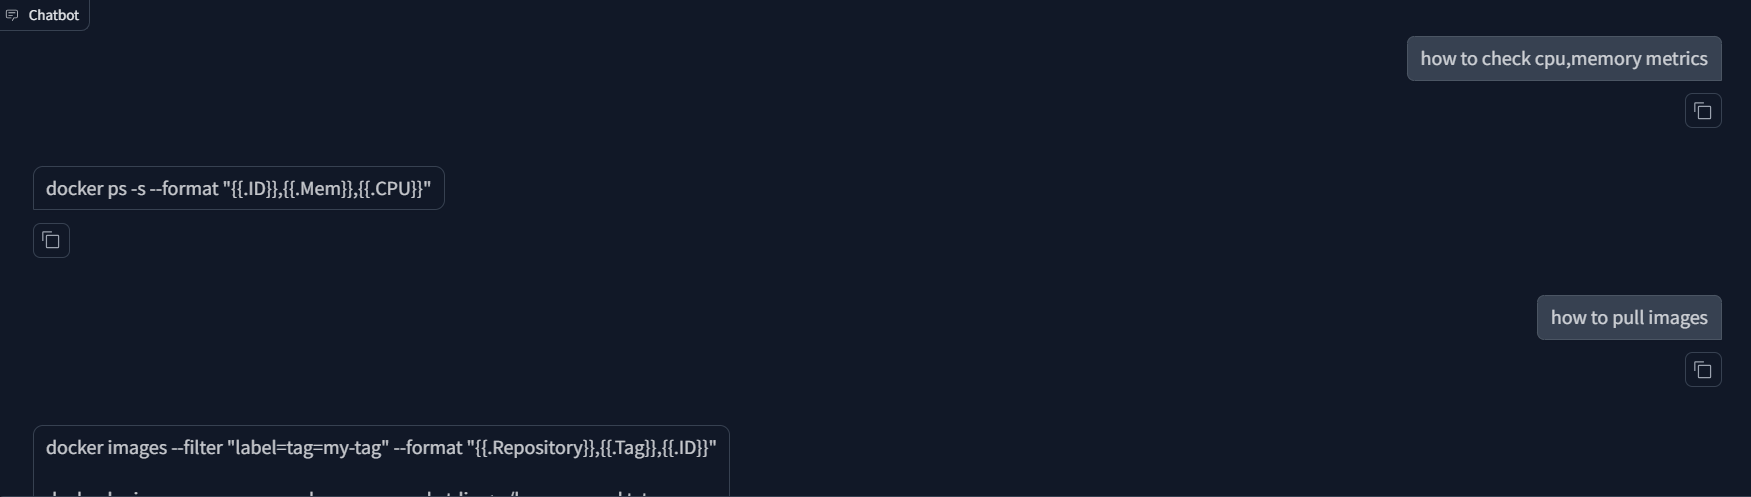

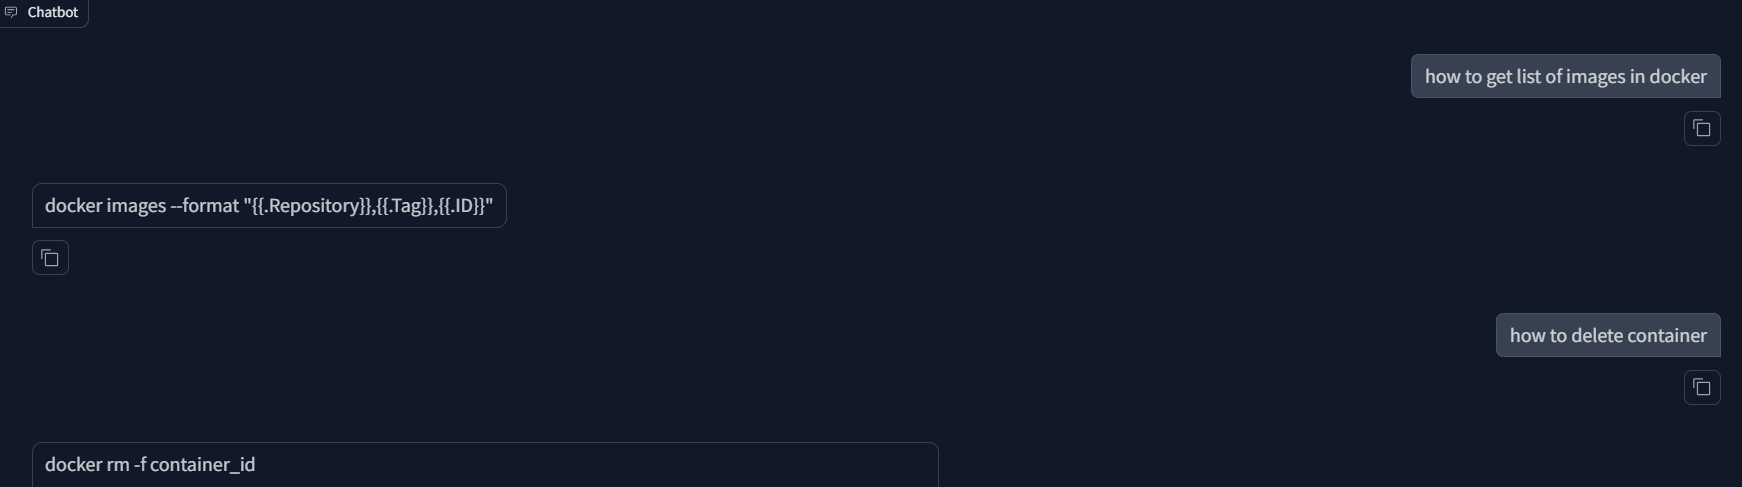